In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import SnowballStemmer, WordNetLemmatizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kalashkala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kalashkala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kalashkala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kalashkala/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Analysing the dataset

In [4]:
df = pd.read_csv('bbc_text_cls.csv')
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [5]:
df.isna().sum()

text      0
labels    0
dtype: int64

In [6]:
df['labels'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

### Plotting a few graphs

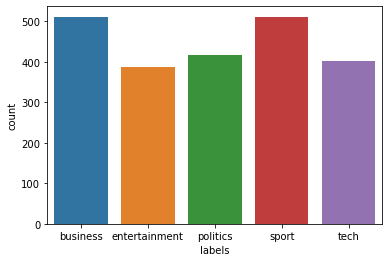

In [7]:
sns.countplot(data=df,x='labels')
plt.show()

From value_counts and above graph we can see that all the labels are almost equally distributed, so we can make use of the standard metrics

### Data Preprocessing

In [8]:
X = df['text']
y = df['labels']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Without stopword removal and lemmatiser

In [10]:
vectoriser = TfidfVectorizer()

In [11]:
X_train_tfidf = vectoriser.fit_transform(X_train)
X_test_tfidf = vectoriser.transform(X_test)

In [12]:
X_train_tfidf

<1490x24920 sparse matrix of type '<class 'numpy.float64'>'
	with 301262 stored elements in Compressed Sparse Row format>

In [13]:
X_train_tfidf.shape

(1490, 24920)

### Function for checking every model accuracy and confusion matrix

In [14]:
def model_performance(model):
    
    model.fit(X_train_tfidf,y_train)
    predictions = model.predict(X_test_tfidf)
    
    print(classification_report(y_true=y_test,y_pred=predictions))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=predictions)).plot()

### Logistic Regression

In [15]:
lgr = LogisticRegression(max_iter=5000)

               precision    recall  f1-score   support

     business       0.96      0.97      0.97       185
entertainment       0.98      0.95      0.97       129
     politics       0.97      0.96      0.97       131
        sport       0.98      0.99      0.99       155
         tech       0.96      0.96      0.96       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



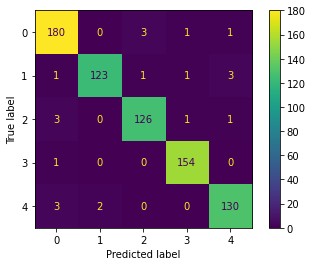

In [16]:
model_performance(lgr)

### Linear SVC

In [17]:
linear_svc = SVC(kernel='linear')

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       185
entertainment       0.98      0.99      0.98       129
     politics       0.96      0.96      0.96       131
        sport       0.99      0.99      0.99       155
         tech       0.98      0.99      0.98       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



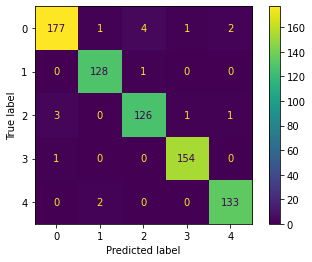

In [18]:
model_performance(linear_svc)

### SVC (kernel : rbf)

In [19]:
svc = SVC()

               precision    recall  f1-score   support

     business       0.95      0.97      0.96       185
entertainment       0.98      0.96      0.97       129
     politics       0.96      0.95      0.96       131
        sport       0.99      0.99      0.99       155
         tech       0.97      0.96      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



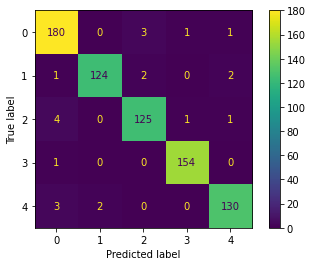

In [20]:
model_performance(svc)

### Random Forrest Classifier

In [21]:
RFC = RandomForestClassifier()

               precision    recall  f1-score   support

     business       0.91      0.96      0.94       185
entertainment       0.98      0.92      0.95       129
     politics       0.95      0.94      0.95       131
        sport       0.95      0.99      0.97       155
         tech       0.98      0.93      0.95       135

     accuracy                           0.95       735
    macro avg       0.96      0.95      0.95       735
 weighted avg       0.95      0.95      0.95       735



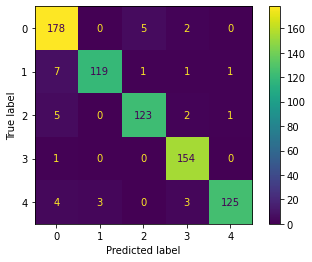

In [22]:
model_performance(RFC)

### Multinomial Naive Bayes

In [23]:
MNB = MultinomialNB()

               precision    recall  f1-score   support

     business       0.96      0.95      0.95       185
entertainment       0.99      0.84      0.91       129
     politics       0.91      0.97      0.94       131
        sport       0.92      0.99      0.96       155
         tech       0.96      0.97      0.97       135

     accuracy                           0.95       735
    macro avg       0.95      0.94      0.95       735
 weighted avg       0.95      0.95      0.95       735



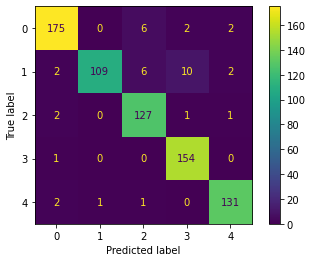

In [24]:
model_performance(MNB)

### K nearest neighbours

In [25]:
KNN = KNeighborsClassifier()

               precision    recall  f1-score   support

     business       0.97      0.84      0.90       185
entertainment       0.99      0.88      0.93       129
     politics       0.78      0.99      0.88       131
        sport       0.96      0.99      0.97       155
         tech       0.93      0.93      0.93       135

     accuracy                           0.92       735
    macro avg       0.93      0.93      0.92       735
 weighted avg       0.93      0.92      0.92       735



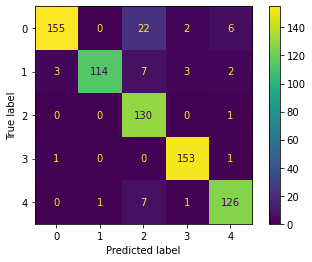

In [26]:
model_performance(KNN)

## using stop words removal and not lemmatiser

In [27]:
vectoriser = TfidfVectorizer(stop_words='english')

In [28]:
X_train_tfidf = vectoriser.fit_transform(X_train)
X_test_tfidf = vectoriser.transform(X_test)

In [29]:
X_train_tfidf.shape

(1490, 24630)

### Logistic Regression

               precision    recall  f1-score   support

     business       0.96      0.98      0.97       185
entertainment       0.99      0.97      0.98       129
     politics       0.97      0.97      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.98      0.98      0.98       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



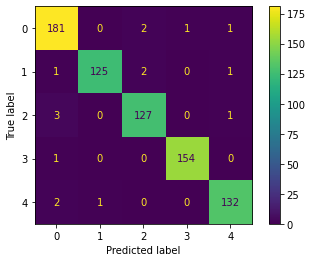

In [30]:
model_performance(lgr)

### Linear SVC

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       185
entertainment       0.98      0.99      0.99       129
     politics       0.96      0.97      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.98      0.98      0.98       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



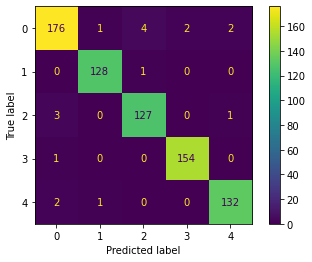

In [31]:
model_performance(linear_svc)

### SVC (Kernel : rbf)

               precision    recall  f1-score   support

     business       0.96      0.97      0.97       185
entertainment       0.99      0.98      0.99       129
     politics       0.97      0.98      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.98      0.96      0.97       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



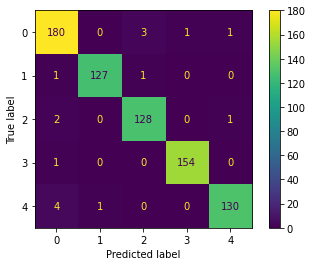

In [32]:
model_performance(svc)

### Random Forrest Classifier

               precision    recall  f1-score   support

     business       0.95      0.97      0.96       185
entertainment       1.00      0.95      0.97       129
     politics       0.95      0.96      0.96       131
        sport       0.96      0.99      0.98       155
         tech       0.98      0.96      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



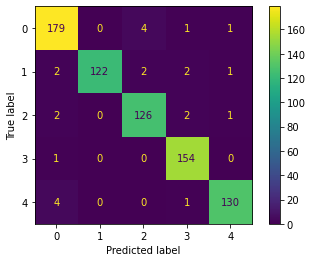

In [33]:
model_performance(RFC)

### Multinomial Naive Bayes

               precision    recall  f1-score   support

     business       0.97      0.96      0.97       185
entertainment       0.99      0.93      0.96       129
     politics       0.93      0.98      0.95       131
        sport       0.99      0.99      0.99       155
         tech       0.97      0.99      0.98       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



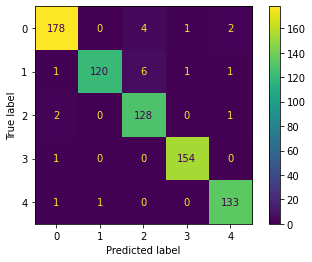

In [34]:
model_performance(MNB)

### K nearest neigbours

               precision    recall  f1-score   support

     business       0.93      0.88      0.90       185
entertainment       0.98      0.91      0.94       129
     politics       0.87      0.96      0.91       131
        sport       0.94      0.97      0.96       155
         tech       0.95      0.93      0.94       135

     accuracy                           0.93       735
    macro avg       0.93      0.93      0.93       735
 weighted avg       0.93      0.93      0.93       735



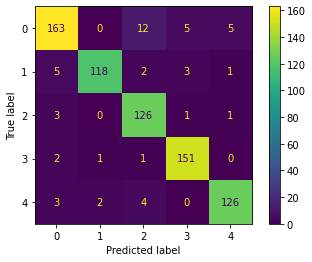

In [35]:
model_performance(KNN)

## Removing stop words and using lemmatiser or stemmer

This function maps nltk POS with wordnet POS

In [36]:
def get_wordnet_pos(tag : str):
    if(tag.startswith('J')):
        return wordnet.ADJ
    if(tag.startswith('V')):
        return wordnet.VERB
    if(tag.startswith('N')):
        return wordnet.NOUN
    if(tag.startswith('R')):
        return wordnet.ADV
    
    return wordnet.NOUN

Creating Lemmatiser class

In [37]:
class LemmatiserTokeniser:
    def __init__(self) -> None:
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        word_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(words,pos = get_wordnet_pos(tags)) for words, tags in word_and_tags]

### Using Port Stemmer

In [38]:
vectoriser = TfidfVectorizer(stop_words='english')
snowball_stemer = SnowballStemmer(language="english")

In [39]:
# index = 1
# for sentence in X_train[:5]:
#     print(f"{index} : {sentence}")
#     index+=1

In [40]:
for sentence in X_train[:5]:
    for word in list(sentence.split()):
        print(snowball_stemer.stem(word),end=" ")
    print()

wolv appoint hoddl as manag glenn hoddl will be unveil as the new wolv manag on tuesday. the club have confirm that the former england coach will be unveil as the successor to dave jone at a news confer at molineux at 1100 gmt. hoddl has been link with a return to former club southampton but wolv have won the race for his services. he has been out of the game sinc be sack at spur in septemb 2003 and work alongsid wolv caretak boss stuart gray at southampton. hoddl began his manageri career as player-boss with swindon befor move on to chelsea and then take up the england job. his spell in charg of the nation side came to an end after the 1998 world cup when he made controversi remark about the disabl in a newspap interview. the 47-year-old later return to manag with southampton, where he again succeed jone - as he has now done at wolves. he engin an upturn in saint fortun befor be lure to white hart lane by tottenham - the club where he made his name as a player. that relationship turn 

In [41]:
def stemmer(sentence : str) -> str:
    
    x = sentence.lower().split()
    final = [snowball_stemer.stem(word) for word in x]
    
    stemmed_string = ' '.join(final)
    return stemmed_string


In [42]:
print(stemmer(X_train[0]))

ad sale boost time warner profit quarter profit at us media giant timewarn jump 76% to $1.13bn (£600m) for the three month to december, from $639m year-earlier. the firm, which is now one of the biggest investor in google, benefit from sale of high-spe internet connect and higher advert sales. timewarn said fourth quarter sale rose 2% to $11.1bn from $10.9bn. it profit were buoy by one-off gain which offset a profit dip at warner bros, and less user for aol. time warner said on friday that it now own 8% of search-engin google. but it own internet business, aol, had has mix fortunes. it lost 464,000 subscrib in the fourth quarter profit were lower than in the preced three quarters. however, the compani said aol under profit befor except item rose 8% on the back of stronger internet advertis revenues. it hope to increas subscrib by offer the onlin servic free to timewarn internet custom and will tri to sign up aol exist custom for high-spe broadband. timewarn also has to restat 2000 and 

In [43]:
X_train_stemmed = X_train.apply(stemmer)
X_train_stemmed

1538    wolv appoint hoddl as manag glenn hoddl will b...
187     qwest may spark mci bid war us phone compani q...
619     rap boss arrest over drug find rap mogul mario...
2000    microsoft debut secur tool microsoft is releas...
158     india unveil anti-poverti budget india is to b...
                              ...                        
1638    robinson answer critic england captain jason r...
1095    mallon wade into ne vote battl middlesbrough m...
1130    lib dem new elect pr chief the lib dem have ap...
1294    tori reject rethink on axe mp sack mp howard f...
860     women in film are earn less women in the uk fi...
Name: text, Length: 1490, dtype: object

In [44]:
X_test_stemmed = X_test.apply(stemmer)
X_test_stemmed

414     uk hous price dip in novemb uk hous price dip ...
420     lse set date for takeov deal the london stock ...
1644    harinordoquy suffer franc axe number eight ima...
416     barclay share up on merger talk share in uk ba...
1232    campaign cold call question labour and the con...
                              ...                        
1665    scot suffer anoth injuri blow scotland back ro...
1471    mourinho defiant on chelsea form chelsea boss ...
182     busi fear over sluggish eu economi as european...
170     deutsch boers boost dividend deutsch boerse, t...
1728    itali 8-38 wale wale secur their first away wi...
Name: text, Length: 735, dtype: object

In [45]:
X_train_tfidf = vectoriser.fit_transform(X_train_stemmed)
X_test_tfidf = vectoriser.transform(X_test_stemmed)

In [46]:
X_train_tfidf.shape

(1490, 22296)

### Logistic Regression

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       185
entertainment       0.99      0.98      0.98       129
     politics       0.96      0.98      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.99      0.98      0.98       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



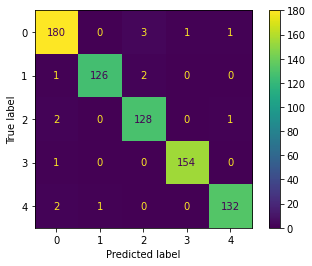

In [47]:
model_performance(lgr)

### Linear SVC

               precision    recall  f1-score   support

     business       0.98      0.95      0.96       185
entertainment       0.98      0.99      0.99       129
     politics       0.96      0.98      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.98      0.99      0.99       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



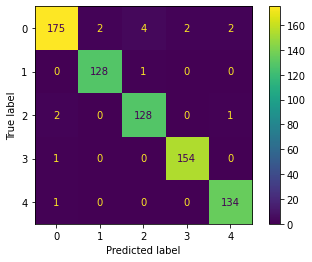

In [48]:
model_performance(linear_svc)

### SVC (Kernel : rbf)

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       185
entertainment       0.99      0.98      0.99       129
     politics       0.97      0.98      0.97       131
        sport       0.99      0.99      0.99       155
         tech       0.99      0.98      0.98       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735



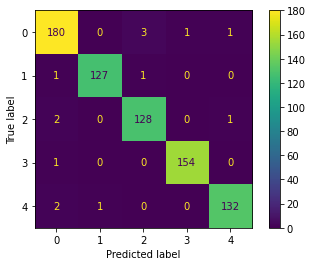

In [49]:
model_performance(svc)

### Random Forrest

               precision    recall  f1-score   support

     business       0.92      0.97      0.94       185
entertainment       1.00      0.95      0.97       129
     politics       0.97      0.95      0.96       131
        sport       0.99      1.00      0.99       155
         tech       0.97      0.95      0.96       135

     accuracy                           0.96       735
    macro avg       0.97      0.96      0.97       735
 weighted avg       0.97      0.96      0.96       735



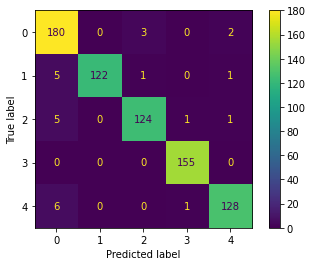

In [50]:
model_performance(RFC)

### Multinomial Bayes

               precision    recall  f1-score   support

     business       0.96      0.96      0.96       185
entertainment       0.99      0.93      0.96       129
     politics       0.93      0.98      0.95       131
        sport       0.99      0.99      0.99       155
         tech       0.97      0.97      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



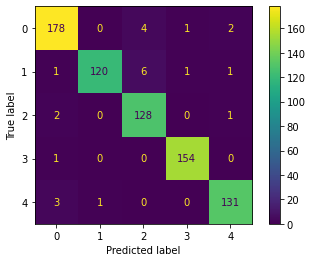

In [51]:
model_performance(MNB)

### K nearest neighbour

               precision    recall  f1-score   support

     business       0.94      0.89      0.91       185
entertainment       0.98      0.91      0.94       129
     politics       0.87      0.96      0.91       131
        sport       0.94      0.98      0.96       155
         tech       0.93      0.94      0.94       135

     accuracy                           0.93       735
    macro avg       0.93      0.94      0.93       735
 weighted avg       0.94      0.93      0.93       735



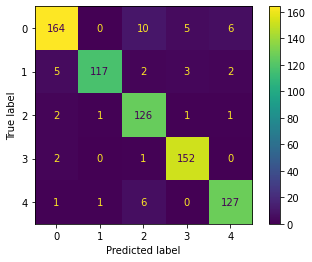

In [52]:
model_performance(KNN)

### Using Lemmatiser

In [53]:
vectoriser = TfidfVectorizer(stop_words='english',tokenizer=LemmatiserTokeniser())

In [ ]:
X_train_tfidf = vectoriser.fit_transform(X_train)
X_test_tfidf = vectoriser.transform(X_test)

### Logistic Regression

               precision    recall  f1-score   support

     business       0.96      0.96      0.96       185
entertainment       0.98      0.96      0.97       129
     politics       0.95      0.97      0.96       131
        sport       0.97      0.99      0.98       155
         tech       0.98      0.96      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



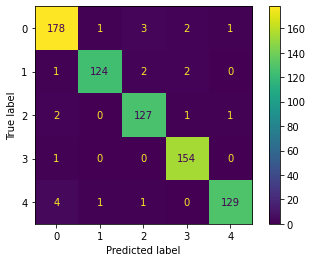

In [55]:
model_performance(lgr)

### Linear SVC

               precision    recall  f1-score   support

     business       0.98      0.95      0.97       185
entertainment       0.97      0.98      0.98       129
     politics       0.96      0.96      0.96       131
        sport       0.97      0.99      0.98       155
         tech       0.99      0.99      0.99       135

     accuracy                           0.97       735
    macro avg       0.97      0.98      0.97       735
 weighted avg       0.97      0.97      0.97       735



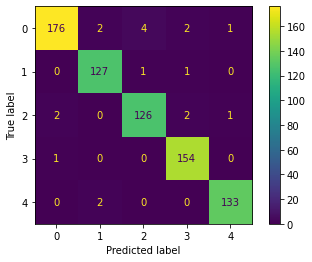

In [56]:
model_performance(linear_svc)

### SVC (Kernel : rbf)

               precision    recall  f1-score   support

     business       0.96      0.97      0.96       185
entertainment       0.98      0.97      0.98       129
     politics       0.96      0.96      0.96       131
        sport       0.97      0.99      0.98       155
         tech       0.98      0.96      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



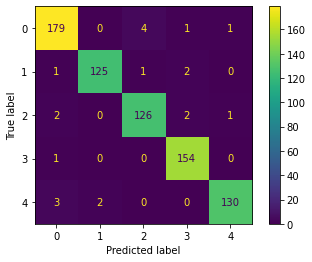

In [58]:
model_performance(svc)

### Random Forrest

               precision    recall  f1-score   support

     business       0.92      0.97      0.94       185
entertainment       1.00      0.90      0.95       129
     politics       0.95      0.96      0.95       131
        sport       0.95      0.99      0.97       155
         tech       0.98      0.94      0.96       135

     accuracy                           0.96       735
    macro avg       0.96      0.95      0.96       735
 weighted avg       0.96      0.96      0.96       735



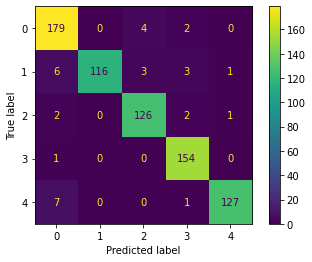

In [59]:
model_performance(RFC)

### Multinomial Bayes

               precision    recall  f1-score   support

     business       0.96      0.96      0.96       185
entertainment       0.99      0.91      0.95       129
     politics       0.93      0.98      0.96       131
        sport       0.98      0.99      0.99       155
         tech       0.97      0.97      0.97       135

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



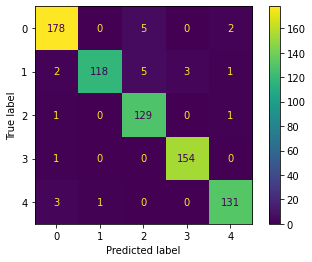

In [60]:
model_performance(MNB)

### K nearest neighbours

               precision    recall  f1-score   support

     business       0.97      0.90      0.93       185
entertainment       0.98      0.91      0.94       129
     politics       0.86      0.96      0.91       131
        sport       0.97      0.99      0.98       155
         tech       0.92      0.95      0.93       135

     accuracy                           0.94       735
    macro avg       0.94      0.94      0.94       735
 weighted avg       0.94      0.94      0.94       735



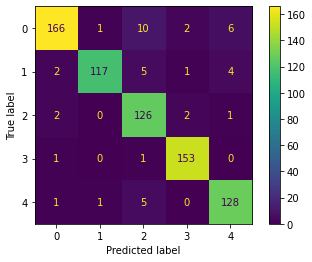

In [61]:
model_performance(KNN)